In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report


In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [4]:
X_train.shape


(50000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
classes = ["Airplane","Automobile","Bird","Cat","deer","Dog","Frog","Horse","Ship","Truck"]

In [93]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


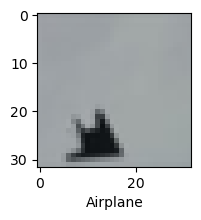

In [95]:
plot_sample(X_train, y_train,-6)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [15]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

**CNN Model**

In [16]:
cnn = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [17]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3895 - loss: 1.6772
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5959 - loss: 1.1513
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6467 - loss: 1.0094
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6872 - loss: 0.9036
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7095 - loss: 0.8333
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7320 - loss: 0.7711
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7522 - loss: 0.7164
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7640 - loss: 0.6730
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7816 - loss: 0.6236
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7910 - loss: 0.5922


In [19]:
np.unique(y_train)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [20]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7006 - loss: 0.9086


[0.9272476434707642, 0.6976000070571899]

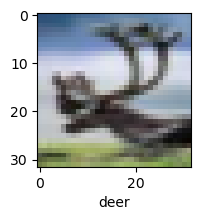

In [137]:
plot_sample(X_test,y_test,40
           )

In [22]:
y_pred=cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [107]:
y_pred[:5]

array([[2.38836859e-03, 6.43015228e-05, 4.25633229e-03, 6.39584363e-01,
        2.19206311e-04, 1.18615925e-02, 5.51707931e-02, 6.71483940e-05,
        2.86210895e-01, 1.76991598e-04],
       [5.21089067e-04, 1.43355221e-01, 3.89600427e-06, 4.54735982e-08,
        2.36565597e-07, 8.40470971e-10, 7.59182495e-09, 1.57812419e-09,
        8.54904771e-01, 1.21480576e-03],
       [1.11593194e-01, 3.95736426e-01, 1.29278889e-02, 2.41751298e-02,
        1.58305820e-02, 6.45582157e-04, 1.20024684e-04, 3.41065042e-02,
        1.18831538e-01, 2.86033094e-01],
       [9.01331842e-01, 1.43452343e-02, 2.17629131e-02, 6.59722183e-03,
        2.72400659e-02, 2.34951483e-04, 5.77361934e-05, 1.12913933e-03,
        2.39516664e-02, 3.34916357e-03],
       [1.37110692e-05, 7.55552901e-05, 1.93949491e-02, 5.09474706e-03,
        4.49124128e-01, 1.53695379e-04, 5.26139736e-01, 5.97713452e-08,
        2.67613746e-06, 7.57090049e-07]], dtype=float32)

In [195]:
y_classes = [np.argmax(element) for element in y_pred] # Get the class with highest predicted probability
y_classes[:5]


[3, 8, 1, 0, 6]

**Correct Classification**

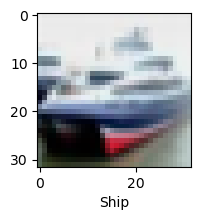

In [139]:
plot_sample(X_test,y_test,1
           )

In [145]:
classes[y_classes[1]] #Correct Classification

'Ship'

**Wrong Classification**

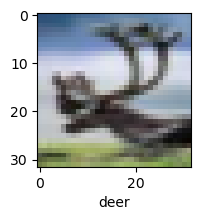

In [133]:
plot_sample(X_test,y_test,40
           )

In [199]:
classes[y_classes[40]] #Wrong Classification Its an image of deer but its classifying Automobile

'Automobile'

**Actual Testing Data Issued**

In [159]:
y_test[:5] #Actual Testing Data Issued

array([3, 8, 8, 0, 6], dtype=uint8)

**After applying cnn model on Testing Data**

In [207]:
y_classes[:5] #Predicted Data

[3, 8, 1, 0, 6]

In [185]:
#Additional Just to know how many unmatched classifications are there
unmatch = []
for i in range(len(y_test)):
    if y_test[i] != y_classes[i]:
        unmatch.append((y_test[i], y_classes[i]))
print("Total Data:", len(y_test))
print("Total mismatches:", len(unmatch))


Total Data: 10000
Total mismatches: 3024


In [218]:
# Print precision, recall, and F1-score for each class
print("Classification Report : \n",classification_report(y_test,y_classes))

Classification Report : 
               precision    recall  f1-score   support

           0       0.73      0.72      0.72      1000
           1       0.79      0.85      0.82      1000
           2       0.65      0.58      0.61      1000
           3       0.48      0.58      0.53      1000
           4       0.69      0.59      0.64      1000
           5       0.67      0.51      0.58      1000
           6       0.74      0.79      0.77      1000
           7       0.74      0.75      0.75      1000
           8       0.81      0.77      0.79      1000
           9       0.71      0.82      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [220]:
for i in range(len(classes)):
    print(i,'=',classes[i])

0 = Airplane
1 = Automobile
2 = Bird
3 = Cat
4 = deer
5 = Dog
6 = Frog
7 = Horse
8 = Ship
9 = Truck


**Conclusion (with Class Names)
The model got 70% accuracy overall on the CIFAR-10 dataset.
Best results:
It did really well on Automobile, Ship, Frog, and Horse these were predicted correctly most of the time.
Weak spots:
Cat, Dog, and Bird were often confused with each other. Cat was the toughest, with the lowest accuracy.**